# Cluster Visualization of a driven harmonic pendulum Omega vs Theta

Text(0, 0.5, 'OMEGA')

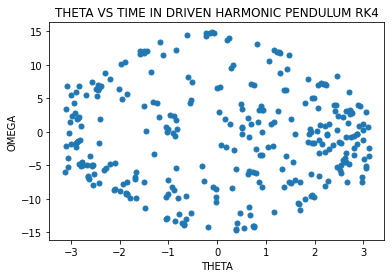

In [2]:
from pylab import *
theta  = 0.5
omega = 2./3.
T0 = 2*pi
q = 0.5
t = 0
b =  q*T0
Fd = 1.2
A = Fd*T0*T0
kappa = omega*T0
theta_list = [theta]
omega_list = [omega]
t_list = [t]
def f(t,theta,omega):
    return omega
def g(t,theta,omega):
    return -4*pi*pi*sin(theta) - b*omega + A*sin(kappa*t)
end_time = 30
N = 300
dt = end_time/N
for i in range(0,N):
    k1 = dt*f(t,theta,omega)
    k5 = dt*g(t,theta,omega)
    k2 = dt*f( t+(dt/2) , theta + (0.5*k1) , omega + (0.5*k5) )
    k6 = dt*g( t+(dt/2) , theta + (0.5*k1) , omega + (0.5*k5) )
    k3 = dt*f( t+(dt/2) , theta + (0.5*k2) , omega + (0.5*k6) )
    k7 = dt*g( t+(dt/2) , theta + (0.5*k2) , omega + (0.5*k6) )
    k4 = dt*f( t+dt , theta +k3 , omega + k7 )
    k8 = dt*g( t+dt , theta +k3 , omega + k7 )
    theta += (1/6)*( k1 + 2*k2 + 2*k3 + k4 )
    omega += (1/6)*( k5 + 2*k6 + 2*k7 + k8 )
    if(theta > pi):
        while(theta>pi):
            theta = theta-2*pi
    elif(theta < -pi):
        while(theta < -pi):
            theta = theta + 2*(pi)
    t += dt
    theta_list.append(theta)
    omega_list.append(omega)
    t_list.append(t)
plot(theta_list,omega_list,'.',markersize=10)
title('THETA VS TIME IN DRIVEN HARMONIC PENDULUM RK4')
xlabel('THETA')
ylabel('OMEGA')